# Phase 1 Project: Aircraft Risk Identification

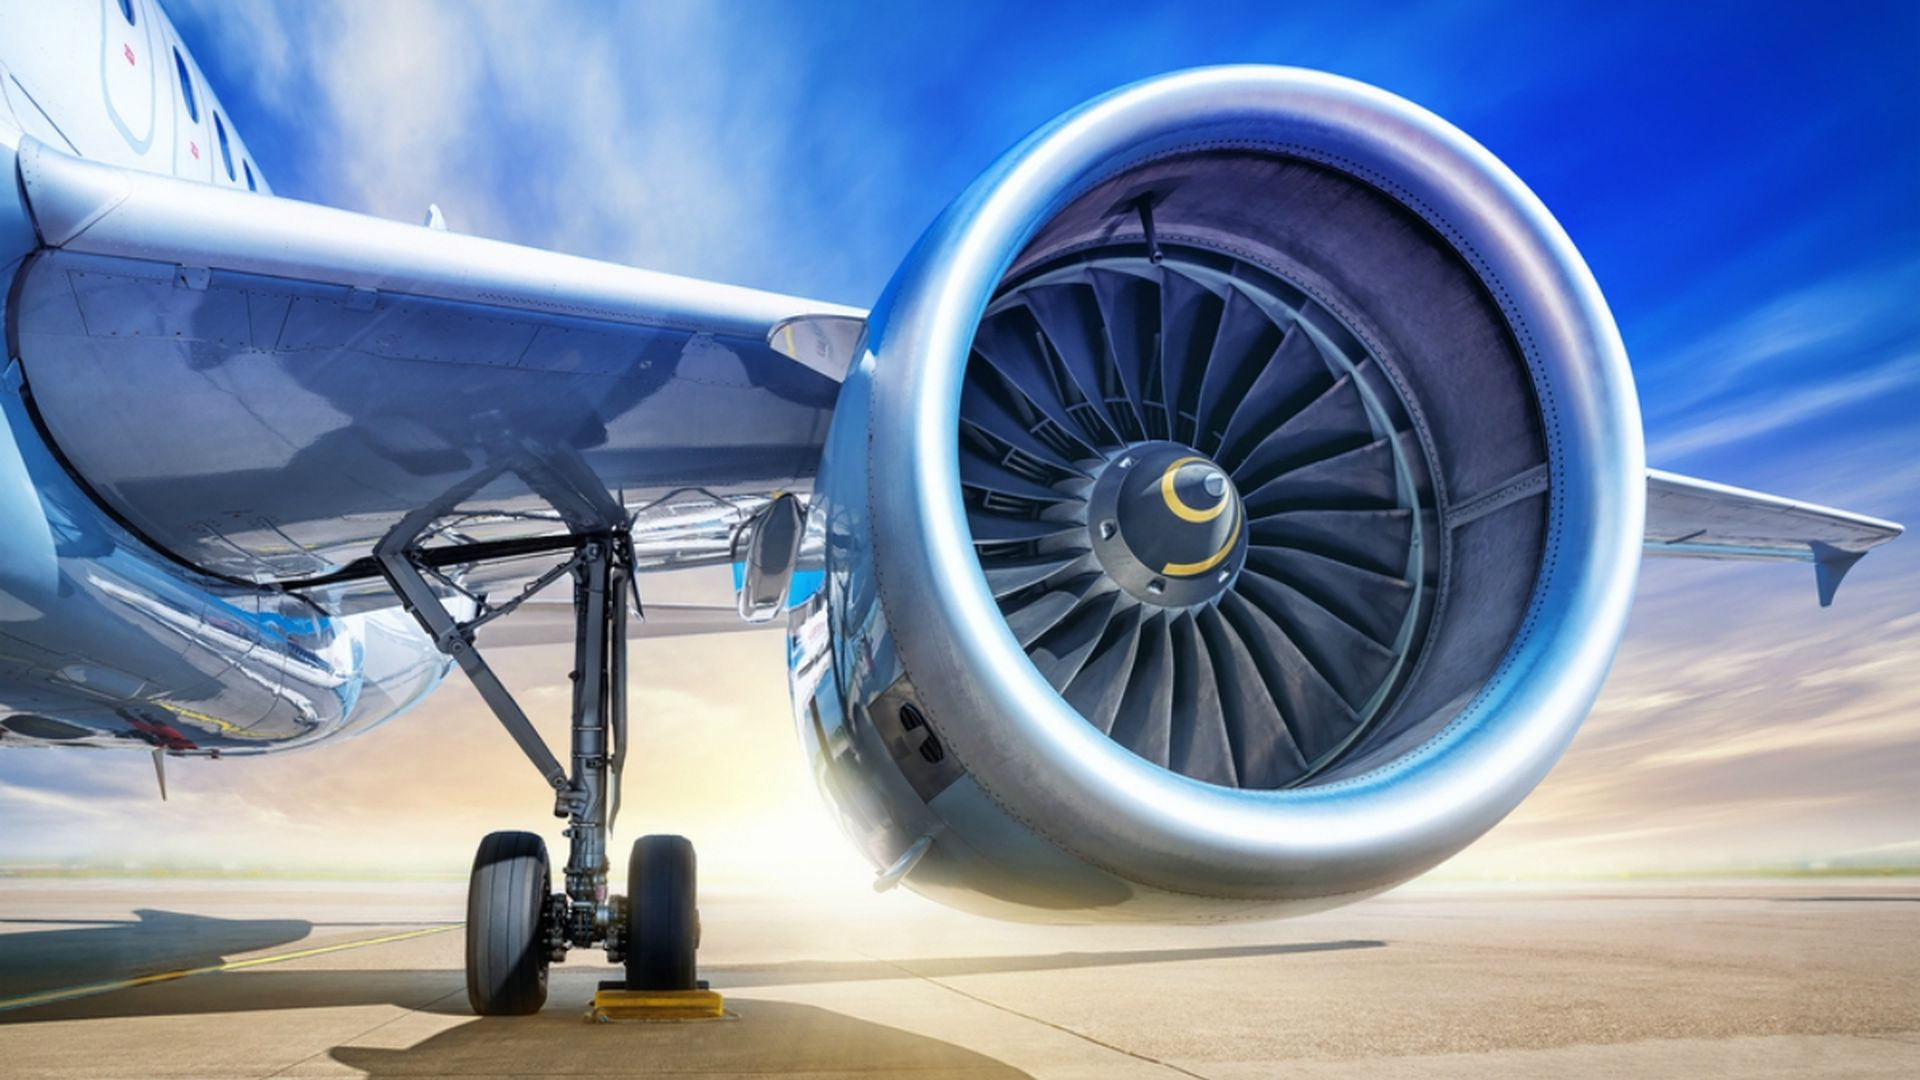

## Introduction

In a time of business expansion companies are driven to diversify by exploring industries. One such opportunity involves entering the aviation sector by
acquiring and operating aircraft, for both private use. This endeavor requires an understanding of the risks associated with aircraft models.
As the assigned analyst the main objective is to navigate through years of aviation accident data ranging from 1962 to 2023 obtained from the National
Transportation Safety Board.
By cleaning analyzing and visualizing this data the goal is to uncover insights that will assist in choosing aircraft with the least risk, for the companys new aviation venture.


## Business Understanding

During a period of business growth companies often seek to expand their horizons by venturing into industries. One promising opportunity involves
entering the aviation field through the acquisition and operation of aircraft. This venture requires an understanding of the risks associated with various aircraft models. This will be achieved by identifying low risk aircraft models through:

- Examining the number of injuries and fatalities associated with each model
- Evaluating the impact of aircraft damage severity
- Assessing the influence of weather conditions
- Analyzing the phase of flight risk
- Correlating engine number and type with safety

## Data Understanding

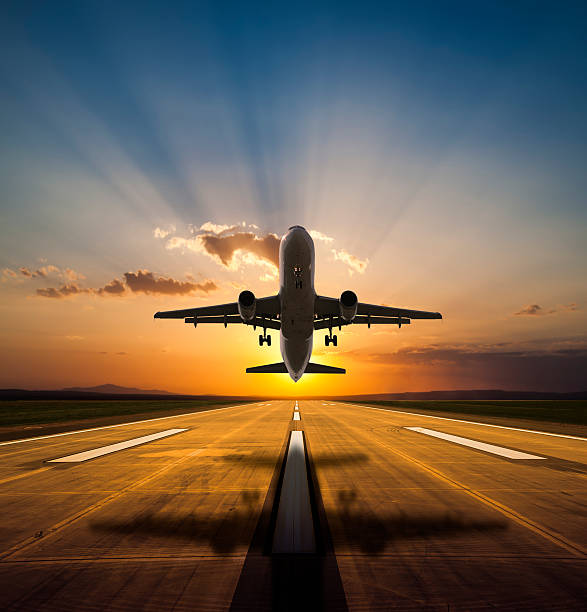

The NTSB aviation accident database contains information from 1948 to 2022 about civil aviation accidents and selected incidents within the United
States, its territories and possessions, and in international waters.
It has two datasets named Aviation Data and USState Codes.
The Aviation dataset has values of aircraft with a unique ID drawn from the event ID column. The data files provide the dates and location of each event, as well as other aircraft characteristics such as aircraft make, model, type and number of engines and so many more.
The USState Cosed dataset provides more information on the aviation dataset as it contains data about a state and the abbreviation indicated in the Aviation dataset.
The data types found in these datasets are of continous and categorical nature.

## Reading and Checking the Data

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
file_path = 'C:/Users/Claude/Desktop/Moringa/Phase1/Phase1_Project/Aviation_Project/data/AviationData.csv'

aviation_data_df = pd.read_csv(file_path, encoding='latin-1')

#Accessing the first 5 rows
aviation_data_df.head()

C:\Users\Claude\AppData\Local\Temp\ipykernel_20884\1345689928.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data_df = pd.read_csv(file_path, encoding='latin-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
file2_path = 'C:/Users/Claude/Desktop/Moringa/Phase1/Phase1_Project/Aviation_Project/data/USState_Codes.csv'

state_codes_df = pd.read_csv(file2_path, encoding='latin-1')
state_codes_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


## Data Preparation

Analysis starts by pre-processing data. The first and most initial step is to check all the details about the dataset that were not shown when the first few rows were displayed.

In [4]:
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The information above sheds some light on the fact that there are 88889 rows and 31 columns. The entries are of float and object data type. There is a handful of missing values whose magnitude shall be investigated in the succeeding cell.

In [5]:
aviation_data_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

From the information relayed above, it seems like only 4 columns: `Event.Id`, `Investigation.Type`, `Accident.Number` and `Event.Date`: have all the values in place. All the other column have missing values whose tally is indicated by the numbers alongside the column names.
This might be alarming at first but upon further inspection it is realised that not all 31 columns are need for the analysis. The monster shall be slayed first by picking the features that are of interest to the analysis.

In [6]:
# Filtering important features
features_of_interest = ['Event.Id', 'Event.Date', 'Location', 'Make', 'Model', 'Aircraft.damage', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Weather.Condition', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Broad.phase.of.flight']

# Creating a copy of the dataset with the selected features
aviation_data_df1 = aviation_data_df[features_of_interest]
aviation_data_df1.head()

,Event.Id,Event.Date,Location,Make,Model,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Destroyed,No,1.0,Reciprocating,UNK,2.0,0.0,0.0,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Destroyed,No,1.0,Reciprocating,UNK,4.0,0.0,0.0,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna,172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,NaN,NaN,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell,112,Destroyed,No,1.0,Reciprocating,IMC,2.0,0.0,0.0,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Cessna,501,Destroyed,No,NaN,NaN,VMC,1.0,2.0,NaN,Approach


Now that the relevant columns have been hand picked, there are details regading the new dataset that needs inspection.

In [7]:
aviation_data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Make                    88826 non-null  object 
 4   Model                   88797 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Amateur.Built           88787 non-null  object 
 7   Number.of.Engines       82805 non-null  float64
 8   Engine.Type             81793 non-null  object 
 9   Weather.Condition       84397 non-null  object 
 10  Total.Fatal.Injuries    77488 non-null  float64
 11  Total.Serious.Injuries  76379 non-null  float64
 12  Total.Minor.Injuries    76956 non-null  float64
 13  Broad.phase.of.flight   61724 non-null  object 
dtypes: float64(4), object(10)
memory usage

In [8]:
aviation_data_df1.isnull().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Aircraft.damage            3194
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Weather.Condition          4492
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Broad.phase.of.flight     27165
dtype: int64

Well, it seems like there is no escaping missing values after all. How can the missing vaues be handled?

First, a small reminder of how the datset looks like.

aviation_data_df1.head()

So as to maintain the integrity of the dataset, replacing the missing values with `Unknown` for categorical data and `-99` as the placeholder for continous data strategy is used.
Reason being the missing values are too many to drop which may lead to loosing a good chunk of the datset.                                                                                                                                            

In [9]:
# Replacing missing values with 'Unknown' for categorical data
missing_columns = ['Location', 'Make', 'Model', 'Aircraft.damage', 'Amateur.Built', 'Engine.Type', 'Weather.Condition', 'Broad.phase.of.flight']

for column in missing_columns:
    aviation_data_df1[column].replace(np.nan, 'Unknown', inplace = True)


# Filling NaNs with -99 as the placeholder for continous data
aviation_data_df1['Number.of.Engines'].replace(np.nan, -99, inplace = True)
aviation_data_df1['Total.Fatal.Injuries'].replace(np.nan, -99, inplace = True)
aviation_data_df1['Total.Serious.Injuries'].replace(np.nan, -99, inplace = True)
aviation_data_df1['Total.Minor.Injuries'].replace(np.nan, -99, inplace = True)

C:\Users\Claude\AppData\Local\Temp\ipykernel_20884\1732969572.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviation_data_df1[column].replace(np.nan, 'Unknown', inplace = True)
C:\Users\Claude\AppData\Local\Temp\ipykernel_20884\1732969572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_df1[column].replace(np.nan, 'Unkno

In [10]:
aviation_data_df1.head()

,Event.Id,Event.Date,Location,Make,Model,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Destroyed,No,1.0,Reciprocating,UNK,2.0,0.0,0.0,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Destroyed,No,1.0,Reciprocating,UNK,4.0,0.0,0.0,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna,172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,-99.0,-99.0,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell,112,Destroyed,No,1.0,Reciprocating,IMC,2.0,0.0,0.0,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Cessna,501,Destroyed,No,-99.0,Unknown,VMC,1.0,2.0,-99.0,Approach


Another pre-processing step that is conducted is feature engineering which is achieved by combining the `Make` and `Model` columns to form one column called `Aircraft.Type`. A new dataset which is a coppy of the previous one is then generated to accommodate the new changes.

In [11]:
# Merging 'Make' and 'Model' into one feature 'Aircraft.Type
aviation_data_df1['Aircraft.Type'] = aviation_data_df1.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)

# Dropping the original 'Make' and 'Model' columns
aviation_data_df1.drop(columns=['Make', 'Model'], inplace = True)

# Reordering columns to place 'Aircraft.Type' as the 4th column
columns_reordered = ['Event.Id', 'Event.Date', 'Location', 'Aircraft.Type', 'Aircraft.damage', 'Amateur.Built', 'Number.of.Engines','Engine.Type', 'Weather.Condition', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Broad.phase.of.flight']
aviation_data_df2 = aviation_data_df1[columns_reordered]

C:\Users\Claude\AppData\Local\Temp\ipykernel_20884\229328786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_df1['Aircraft.Type'] = aviation_data_df1.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)
C:\Users\Claude\AppData\Local\Temp\ipykernel_20884\229328786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_df1.drop(columns=['Make', 'Model'], inplace = True)


In [12]:
aviation_data_df2.head()

,Event.Id,Event.Date,Location,Aircraft.Type,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson 108-3,Destroyed,No,1.0,Reciprocating,UNK,2.0,0.0,0.0,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper PA24-180,Destroyed,No,1.0,Reciprocating,UNK,4.0,0.0,0.0,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna 172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,-99.0,-99.0,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell 112,Destroyed,No,1.0,Reciprocating,IMC,2.0,0.0,0.0,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Cessna 501,Destroyed,No,-99.0,Unknown,VMC,1.0,2.0,-99.0,Approach


Seems like everything is now in order, right? Not so fast!
The `Weather.Condition` column has two values spelt differently but mean the same thing. This is the `UNK` and `Unk`. The `.replace()` method is used to correct this oversight.

In [13]:
# Replacing 'UNK' and 'Unk' with 'Unknown' in the 'Weather.Condition' column
aviation_data_df2['Weather.Condition'] = aviation_data_df['Weather.Condition'].replace(['UNK', 'Unk'], 'Unknown')
aviation_data_df2

,Event.Id,Event.Date,Location,Aircraft.Type,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson 108-3,Destroyed,No,1.0,Reciprocating,Unknown,2.0,0.0,0.0,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper PA24-180,Destroyed,No,1.0,Reciprocating,Unknown,4.0,0.0,0.0,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna 172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,-99.0,-99.0,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell 112,Destroyed,No,1.0,Reciprocating,IMC,2.0,0.0,0.0,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Cessna 501,Destroyed,No,-99.0,Unknown,VMC,1.0,2.0,-99.0,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"Annapolis, MD",PIPER PA-28-151,Unknown,No,-99.0,Unknown,NaN,0.0,1.0,0.0,Unknown
88885,20221227106494,2022-12-26,"Hampton, NH",BELLANCA 7ECA,Unknown,No,-99.0,Unknown,NaN,0.0,0.0,0.0,Unknown
88886,20221227106497,2022-12-26,"Payson, AZ",AMERICAN CHAMPION AIRCRAFT 8GCBC,Substantial,No,1.0,Unknown,VMC,0.0,0.0,0.0,Unknown
88887,20221227106498,2022-12-26,"Morgan, UT",CESSNA 210N,Unknown,No,-99.0,Unknown,NaN,0.0,0.0,0.0,Unknown


In [14]:
aviation_data_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88889 non-null  object 
 3   Aircraft.Type           88889 non-null  object 
 4   Aircraft.damage         88889 non-null  object 
 5   Amateur.Built           88889 non-null  object 
 6   Number.of.Engines       88889 non-null  float64
 7   Engine.Type             88889 non-null  object 
 8   Weather.Condition       84397 non-null  object 
 9   Total.Fatal.Injuries    88889 non-null  float64
 10  Total.Serious.Injuries  88889 non-null  float64
 11  Total.Minor.Injuries    88889 non-null  float64
 12  Broad.phase.of.flight   88889 non-null  object 
dtypes: float64(4), object(9)
memory usage: 8.8+ MB


Every missing record has been replaced with the appropriate value apart from the `Weather.Condition` column, AGAIN!. To solve this, the `Nan` records, which mean missing values, are replaced with `Unknown` permanently using the `.fillna(inplace=True)` method.

In [15]:
aviation_data_df2['Weather.Condition'].fillna('Unknown', inplace=True)
aviation_data_df2.tail()

C:\Users\Claude\AppData\Local\Temp\ipykernel_20884\4221862904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviation_data_df2['Weather.Condition'].fillna('Unknown', inplace=True)


,Event.Id,Event.Date,Location,Aircraft.Type,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
88884,20221227106491,2022-12-26,"Annapolis, MD",PIPER PA-28-151,Unknown,No,-99.0,Unknown,Unknown,0.0,1.0,0.0,Unknown
88885,20221227106494,2022-12-26,"Hampton, NH",BELLANCA 7ECA,Unknown,No,-99.0,Unknown,Unknown,0.0,0.0,0.0,Unknown
88886,20221227106497,2022-12-26,"Payson, AZ",AMERICAN CHAMPION AIRCRAFT 8GCBC,Substantial,No,1.0,Unknown,VMC,0.0,0.0,0.0,Unknown
88887,20221227106498,2022-12-26,"Morgan, UT",CESSNA 210N,Unknown,No,-99.0,Unknown,Unknown,0.0,0.0,0.0,Unknown
88888,20221230106513,2022-12-29,"Athens, GA",PIPER PA-24-260,Unknown,No,-99.0,Unknown,Unknown,0.0,1.0,0.0,Unknown


And now to justify that everything is in check, the `.info()` method is ran. This assertains that there are no missing values in our preferred dataset.

In [16]:
aviation_data_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88889 non-null  object 
 3   Aircraft.Type           88889 non-null  object 
 4   Aircraft.damage         88889 non-null  object 
 5   Amateur.Built           88889 non-null  object 
 6   Number.of.Engines       88889 non-null  float64
 7   Engine.Type             88889 non-null  object 
 8   Weather.Condition       88889 non-null  object 
 9   Total.Fatal.Injuries    88889 non-null  float64
 10  Total.Serious.Injuries  88889 non-null  float64
 11  Total.Minor.Injuries    88889 non-null  float64
 12  Broad.phase.of.flight   88889 non-null  object 
dtypes: float64(4), object(9)
memory usage: 8.8+ MB


In [17]:
# Checking that the dataset is as we want it
aviation_data_df2.head()

,Event.Id,Event.Date,Location,Aircraft.Type,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Stinson 108-3,Destroyed,No,1.0,Reciprocating,Unknown,2.0,0.0,0.0,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Piper PA24-180,Destroyed,No,1.0,Reciprocating,Unknown,4.0,0.0,0.0,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna 172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,-99.0,-99.0,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Rockwell 112,Destroyed,No,1.0,Reciprocating,IMC,2.0,0.0,0.0,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Cessna 501,Destroyed,No,-99.0,Unknown,VMC,1.0,2.0,-99.0,Approach


The clean dataset is saved for smooth transition to the next step

In [18]:
# Save the cleaned dataset to a new CSV file
aviation_data_df2.to_csv(r'C:\Users\Claude\Desktop\Moringa\Phase1\Phase1_Project\Aviation_Project\data\Aviation_Data_Cleaned.csv', index=False)

## Data Analysis

In [19]:
file_path = 'C:/Users/Claude/Desktop/Moringa/Phase1/Phase1_Project/Aviation_Project/data/Aviation_Data_Cleaned.csv'

aviation_data_clean = pd.read_csv(file_path, encoding='latin-1')
aviation_data_clean.tail()

,Event.Id,Event.Date,Location,Aircraft.Type,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
88884,20221227106491,2022-12-26,"Annapolis, MD",PIPER PA-28-151,Unknown,No,-99.0,Unknown,Unknown,0.0,1.0,0.0,Unknown
88885,20221227106494,2022-12-26,"Hampton, NH",BELLANCA 7ECA,Unknown,No,-99.0,Unknown,Unknown,0.0,0.0,0.0,Unknown
88886,20221227106497,2022-12-26,"Payson, AZ",AMERICAN CHAMPION AIRCRAFT 8GCBC,Substantial,No,1.0,Unknown,VMC,0.0,0.0,0.0,Unknown
88887,20221227106498,2022-12-26,"Morgan, UT",CESSNA 210N,Unknown,No,-99.0,Unknown,Unknown,0.0,0.0,0.0,Unknown
88888,20221230106513,2022-12-29,"Athens, GA",PIPER PA-24-260,Unknown,No,-99.0,Unknown,Unknown,0.0,1.0,0.0,Unknown


### Objective 1: Examining the number of injuries and fatalities (severity) associated with each model

The first step of analyzing the severity of accidents is to group the data by the `Aircraft.Type` feature while analysing the mean for each type of injury.
Next, the output is combined into a dataframe and then the dataframe is sorted in ascending order. This will allow us to get counts on injuries on `Aircraft.Type`s from the lowest to the highest.

In [20]:
# Grouping the data by 'Aircraft.Type' and calculating the mean for each type of injury
avg_fatal = aviation_data_clean.groupby('Aircraft.Type')['Total.Fatal.Injuries'].mean()
avg_serious = aviation_data_clean.groupby('Aircraft.Type')['Total.Serious.Injuries'].mean()
avg_minor = aviation_data_clean.groupby('Aircraft.Type')['Total.Minor.Injuries'].mean()

# Combining the averages into a single DataFrame
avg_injuries = pd.DataFrame({'Average Fatal': avg_fatal, 'Average Serious': avg_serious, 'Average Minor': avg_minor}).reset_index()

# Sorting the DataFrame in ascending order
avg_injuries_sorted = avg_injuries.sort_values(by=['Average Fatal', 'Average Serious', 'Average Minor'])

# Filtering out rows with non-negative average injuries
avg_injuries_sorted_non_negative = avg_injuries_sorted[(avg_injuries_sorted[['Average Fatal', 'Average Serious', 'Average Minor']] >= 0).all(axis=1)]

The outputs for the Aircraft types with the lowest and highest injury count is shown respectively.

In [21]:
# Select 10 from the top and 10 from the bottom
top_10_injuries = avg_injuries_sorted_non_negative.head(10)
top_10_injuries

,Aircraft.Type,Average Fatal,Average Serious,Average Minor
8,2007 Savage Air LLC EPIC LT,0.0,0.0,0.0
9,2021FX3 LLC CCX-2000,0.0,0.0,0.0
12,67 Flying Dutchman D1/LFD-13,0.0,0.0,0.0
13,737 800,0.0,0.0,0.0
14,777 FF2,0.0,0.0,0.0
18,A. H. Gettings GLASSAIR SH2,0.0,0.0,0.0
21,AAA AIRCRAFT LLC CCX-2000,0.0,0.0,0.0
22,AARDEMA ROBERT JOHN 1 AARDEMA RAG WNG SP,0.0,0.0,0.0
24,AB SPORTINE AVIACIJA LAK 17,0.0,0.0,0.0
26,AB Sportine Aviacija Genesis 2,0.0,0.0,0.0


In [22]:
bottom_10_injuries = avg_injuries_sorted_non_negative.tail(10)
bottom_10_injuries

,Aircraft.Type,Average Fatal,Average Serious,Average Minor
7791,Douglas MD-11,76.333333,0.0,0.0
4075,Boeing 747-131,76.666667,0.0,0.0
7793,Douglas MD-83,88.000000,0.0,0.0
997,Aerospatiale CONCORDE VERSION 101,113.000000,0.0,6.0
3909,Boeing -737-222,123.000000,0.0,0.0
310,AIRBUS A310,152.000000,0.0,1.0
2506,BOEING MD-83,153.000000,0.0,0.0
325,AIRBUS A320 - 216,162.000000,0.0,0.0
13070,Mcdonnell Douglas DC-8-62,174.000000,0.0,0.0
2449,BOEING 777 - 206,178.000000,0.0,0.0


Now to visualize the results, we plot horizontal bar graphs as follows.

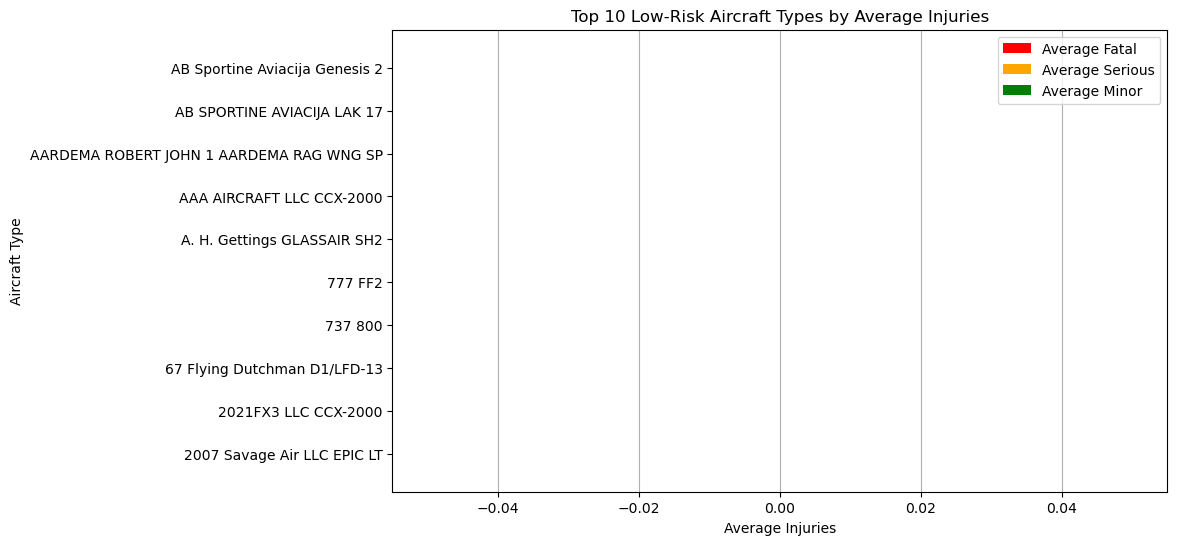

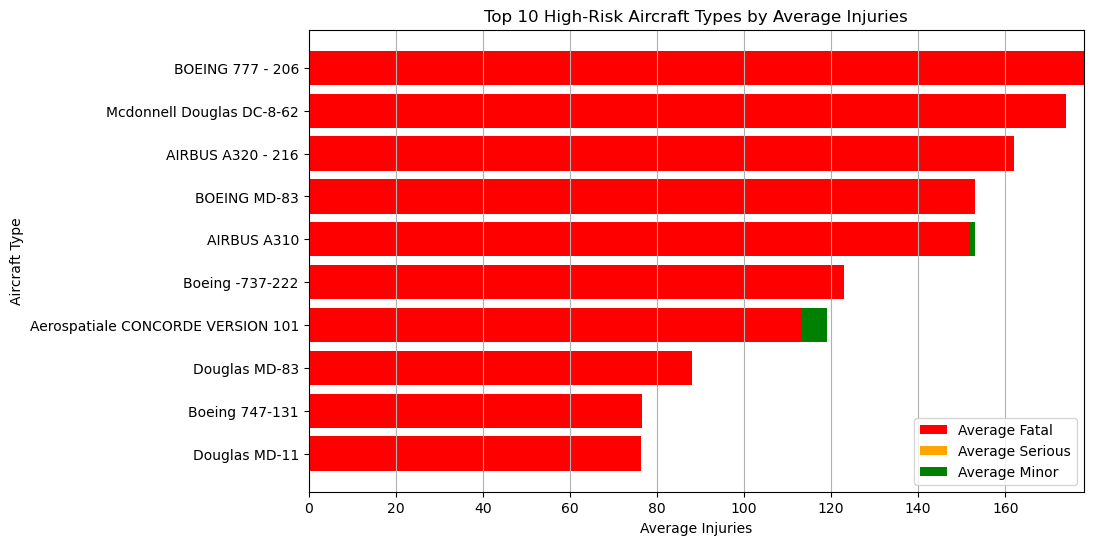

In [23]:
# Plot top 10
plt.figure(figsize=(10, 6))
plt.barh(top_10_injuries['Aircraft.Type'], top_10_injuries['Average Fatal'], color='red', label='Average Fatal')
plt.barh(top_10_injuries['Aircraft.Type'], top_10_injuries['Average Serious'], left=top_10_injuries['Average Fatal'], color='orange', label='Average Serious')
plt.barh(top_10_injuries['Aircraft.Type'], top_10_injuries['Average Minor'], left=top_10_injuries['Average Fatal'] + top_10_injuries['Average Serious'], color='green', label='Average Minor')
plt.xlabel('Average Injuries')
plt.ylabel('Aircraft Type')
plt.title('Top 10 Low-Risk Aircraft Types by Average Injuries')
plt.legend()
plt.grid(axis='x')
plt.show()

# Plot bottom 10
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_injuries['Aircraft.Type'], bottom_10_injuries['Average Fatal'], color='red', label='Average Fatal')
plt.barh(bottom_10_injuries['Aircraft.Type'], bottom_10_injuries['Average Serious'], left=bottom_10_injuries['Average Fatal'], color='orange', label='Average Serious')
plt.barh(bottom_10_injuries['Aircraft.Type'], bottom_10_injuries['Average Minor'], left=bottom_10_injuries['Average Fatal'] + bottom_10_injuries['Average Serious'], color='green', label='Average Minor')
plt.xlabel('Average Injuries')
plt.ylabel('Aircraft Type')
plt.title('Top 10 High-Risk Aircraft Types by Average Injuries')
plt.legend()
plt.grid(axis='x')
plt.show()

From the visualization above it is observed that the first image contains a list of aircraft models that poses a low risk of passengers suffering from minor to fatal injuries should the aircrafts get into an accident.

## Objective 2: Evaluating the impact of aircraft damage severity

This objective is achieved creating a new DataFrame `combined_data` that contains only the rows for the top 10 most frequent and the bottom 10 least frequent aircraft types in the dataset. The lesser the frequency of an aircraft model appearing in the dataset could potentially mean it is a low risk aircraft.

In [24]:
# Getting the value counts for 'Aircraft.Type' and selecting the top 20 aircraft types
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(10).index.tolist()
bottom_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(10).index.tolist()

# Filtering the dataset to include a dataset of 20 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]
bottom_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_10_aircraft_types)]

# Concatenating the top 10 and bottom 10 data
combined_data = pd.concat([top_10_data, bottom_10_data])
combined_data

,Event.Id,Event.Date,Location,Aircraft.Type,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Broad.phase.of.flight
2,20061025X01555,1974-08-30,"Saltville, VA",Cessna 172M,Destroyed,No,1.0,Reciprocating,IMC,3.0,-99.0,-99.0,Cruise
10,20020909X01559,1982-01-01,"HOBBS, NM",Piper PA-28-161,Substantial,No,1.0,Reciprocating,VMC,0.0,0.0,0.0,Approach
18,20020917X02481,1982-01-02,"GALETON, PA",Cessna 172,Substantial,No,1.0,Reciprocating,VMC,0.0,0.0,0.0,Taxi
20,20020917X01894,1982-01-02,"YPSILANTI, MI",Cessna 152,Substantial,No,1.0,Reciprocating,VMC,0.0,0.0,0.0,Takeoff
32,20020917X02618,1982-01-04,"PLEASANT HILL, OR",Piper PA-28-161,Destroyed,No,1.0,Reciprocating,VMC,4.0,0.0,0.0,Cruise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45358,20001211X11537,1998-12-05,"ISTANBUL, Turkey",Beech KINGAIR 300,Destroyed,No,-99.0,Unknown,Unknown,2.0,-99.0,-99.0,Unknown
45360,20001211X11511,1998-12-05,"MADISON, MS",Sid Champion JURCA MJ-5,Substantial,Yes,1.0,Reciprocating,VMC,0.0,0.0,2.0,Takeoff
45363,20001211X11622,1998-12-06,"GARNER, VA",Univair 7GC-AA,Substantial,No,1.0,Reciprocating,VMC,0.0,0.0,0.0,Landing
45366,20001211X11513,1998-12-06,"OKEECHOBEE, FL",Michael L. Thibault RV-4,Substantial,Yes,1.0,Reciprocating,VMC,0.0,0.0,0.0,Climb


When plotted, the relationship between the `Aircraft.Type` count and the extent of the `Aircraft.damage` looks like so.

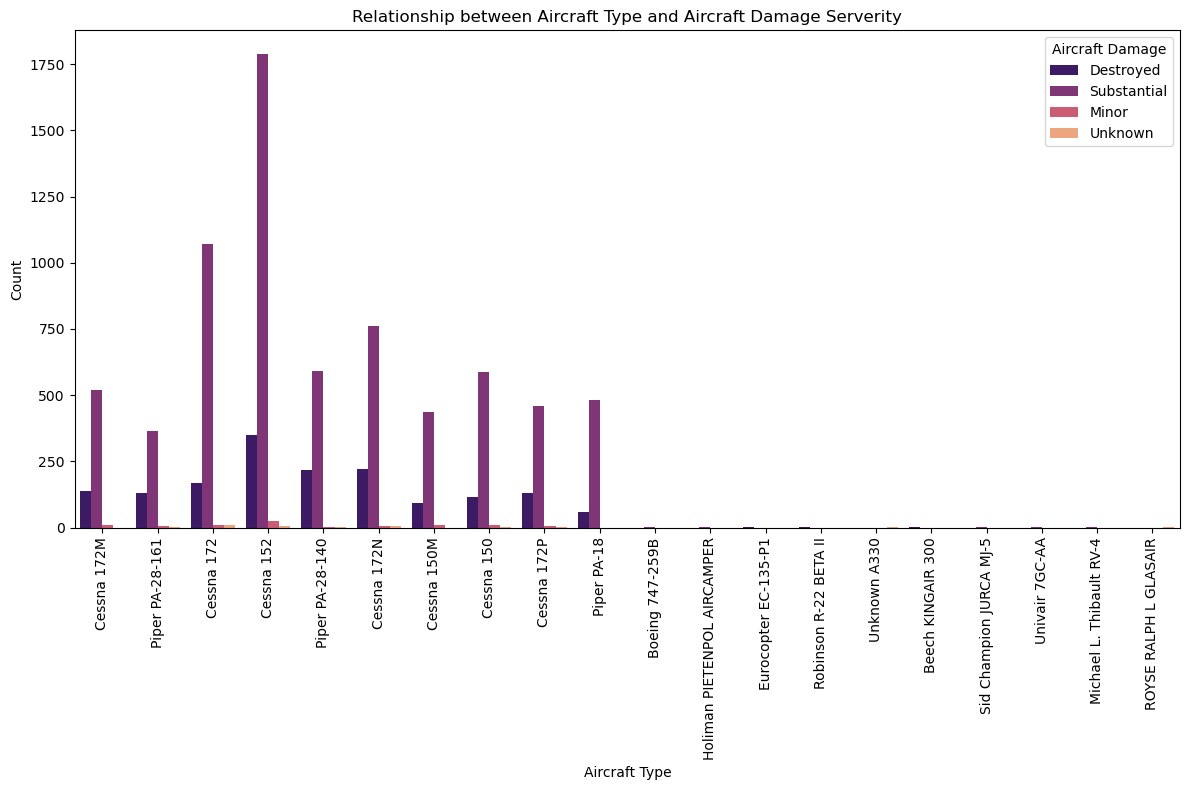

In [25]:
# Plotting the relationship between aircraft type and the extent of aircraft damage.
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_data, x='Aircraft.Type', hue='Aircraft.damage', palette='magma')
plt.title('Relationship between Aircraft Type and Aircraft Damage Serverity')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Damage')
plt.tight_layout()
plt.show()

What do you notice? Are the aircraft models with very low bar graphs similar to the low risk aircraft models grouped by average injuries? The two visualizations produce different results because a lot goes into assessing the risk of an aircraft type. Comparing an aircraft type with only two other features will not give conclusive report, hence, looking into other features is highly advised.

## Objective 3: Assessing the influence of weather conditions

This objective aims to identify which weather conditions pose the highest risk and which aircraft models perform better under various weather scenarios.
Looking just a little bit into the values found in the `Weather.Condition` column, it is found out that the column contains 3 unique features: `VMC`, `IMC` and `Unknown`. `Unknown` means ther was missing data when the data was being collected hence, the value was imputed to replace `NaN`. `VMC` stands for Visual Meteorological Conditions. It refers to weather conditions that are clear enough for a pilot to operate the aircraft using visual references outside the cockpit. In these conditions, pilots can navigate and control the aircraft by looking out the windows and seeing the ground, other aircraft, and obstacles. These conditions generally include good visibility, the absence of significant cloud cover that would obstruct visibility, and sufficient distance from clouds.

`IMC` on the other hand means Instrument Meteorological Conditions.
It refers to weather conditions where visibility is restricted and pilots must rely on their instruments to navigate and control the aircraft. These conditions are often due to clouds, fog, heavy rainfall or other factors that obscure the outside view.
`IMC` occurs when the weather conditions fall below the minimums required for `VMC`. This typically includes conditions where visibility is less than 3 statute miles, or cloud cover is such that pilots cannot maintain the required distance from clouds to operate under VFR.

With that information, analysis can now resume.

In [26]:
aviation_data_clean['Weather.Condition'].value_counts()

Weather.Condition
VMC        77303
IMC         5976
Unknown     5610
Name: count, dtype: int64

The process is similar to how the previous visualizaton the aircraft type against the damage

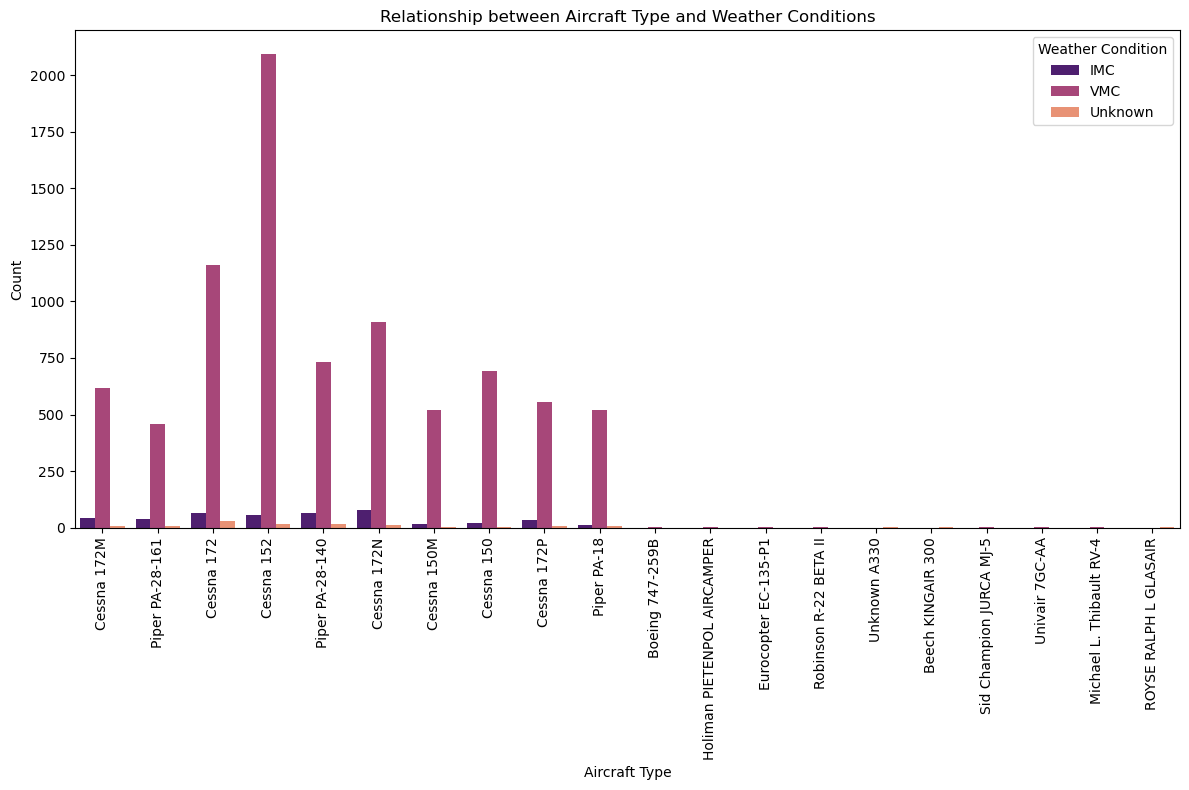

In [27]:
# Getting the top 10 and bottom 10 aircraft types based on occurrence counts
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(10).index.tolist()
bottom_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(10).index.tolist()

# Filtering the dataset to include only the top 10 and bottom 10 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]
bottom_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_10_aircraft_types)]

# Concatenateting the top 10 and bottom 10 data
combined_data = pd.concat([top_10_data, bottom_10_data])

# Plotting the relationship between aircraft type and weather conditions
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_data, x='Aircraft.Type', hue='Weather.Condition', palette='magma')
plt.title('Relationship between Aircraft Type and Weather Conditions')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Weather Condition')
plt.tight_layout()
plt.show()

The aircrafts from Boeing 747 all the way down to ROYSE RALPH display a low count on the effect weather conditions have on them. This allows the conclusion that that the bottom 10 are among the low-risk aircraft models.

## Objective 4: Analyzing the phase of flight risk

After following the same steps in generating data to plot the charts as before, in this objective, a small twist is added where a crosstab is created to show the frequency of each value of `Broad.phase.of.flight` for each aircraft type. This tabulates the counts of different phases of flight (e.g., Approach, Climb, Cruise) for each aircraft type

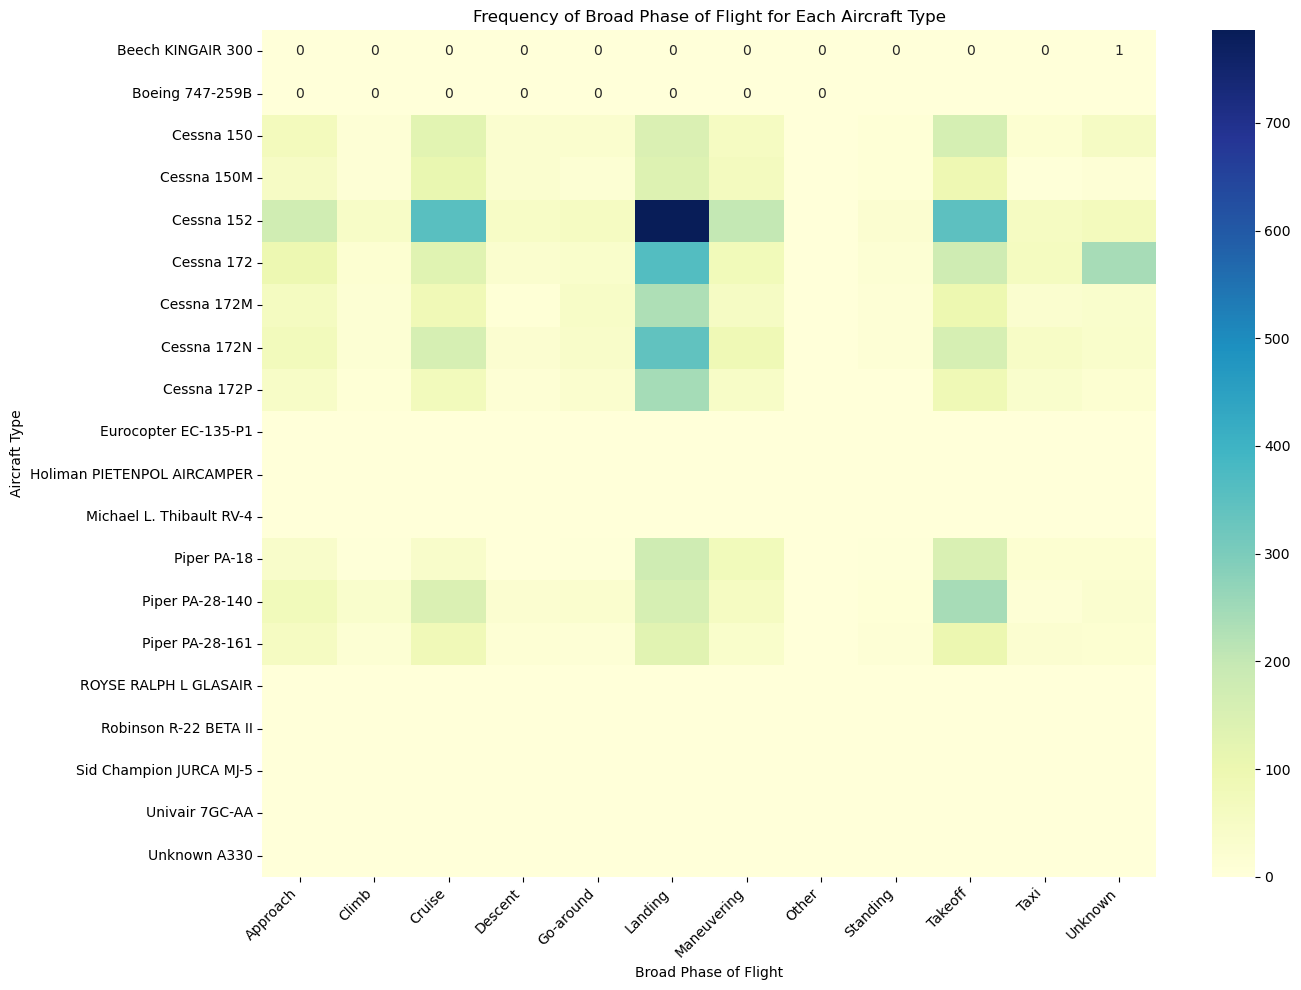

In [28]:
# Get the top 10 and bottom 10 aircraft types based on occurrence counts
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(10).index.tolist()
bottom_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(10).index.tolist()

# Filter the dataset to include only the top 10 and bottom 10 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]
bottom_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_10_aircraft_types)]

# Concatenate the top 10 and bottom 10 data
combined_data = pd.concat([top_10_data, bottom_10_data])

# Create a crosstab to show the frequency of each value of "Broad Phase of Flight" for every "Aircraft.Type"
broad_phase_freq = pd.crosstab(combined_data['Aircraft.Type'], combined_data['Broad.phase.of.flight'])
broad_phase_freq

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(broad_phase_freq, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Frequency of Broad Phase of Flight for Each Aircraft Type')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Aircraft Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The heatmap shows the frequency of each broad phase of flight for each aircraft type. The color gradient from light yellow to dark blue indicates the frequency of occurrences, with dark blue representing higher frequencies.The aircraft types on the y-axis are split between the top 10 and bottom 10 in terms of occurrence in the dataset. For some aircraft types (e.g., Cessna 152, Cessna 172), certain phases of flight (e.g., Approach, Landing) show higher frequencies. This visualization helps in highlighting areas of concern where certain aircraft types might have more incidents during specific phases of flight.

## Objective 5: Correlating engine number and type with safety

### Engine Type

The aim is to analyse the engine type distributions across different aircraft types so as to identify patterns and preferences in engine types for various aircraft models.

In [29]:
aviation_data_clean['Engine.Type'].value_counts()

Engine.Type
Reciprocating      69530
Unknown             9147
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [30]:
aviation_data_clean['Engine.Type'].unique()

array(['Reciprocating', 'Unknown', 'Turbo Fan', 'Turbo Shaft',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

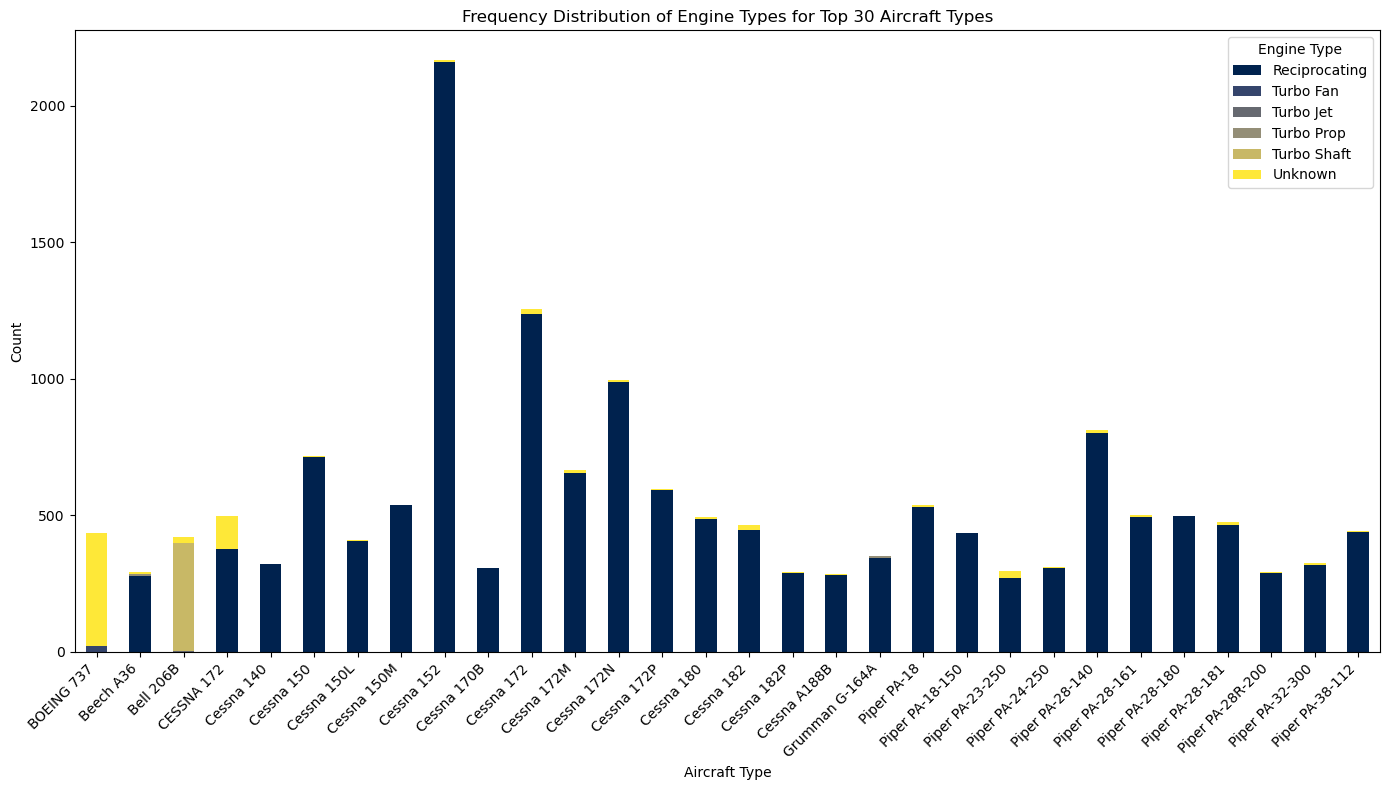

In [31]:
# Getting the top 30 aircraft types based on occurrence counts
top_30_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(30).index.tolist()

# Filtering the dataset to include only the top 30 aircraft types
top_30_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_30_aircraft_types)]

# Creating a crosstab to show the frequency of each engine type for every top aircraft type
engine_type_freq = pd.crosstab(top_30_data['Aircraft.Type'], top_30_data['Engine.Type'])

# Plotting the stacked bar chart
engine_type_freq.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='cividis')
plt.title('Frequency Distribution of Engine Types for Top 30 Aircraft Types')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()

This stacked bar chart shows the frequency distribution of different engine types for each of the top 30 aircraft types. The X-axis `Aircraft.Type` represents the top 30 aircraft types. Each bar corresponds to one aircraft type. The y-axis represents the count of occurrences. It shows how many times each engine type appears for the respective aircraft type.
Each bar is divided into segments, with each segment representing a different engine type. The height of each segment indicates the frequency of that engine type for the corresponding aircraft type. The colors of the segments correspond to different engine types as indicated in the legend (e.g., Reciprocating, Turbo Fan, Turbo Jet).

For many aircraft types (e.g., various Cessna models), the Reciprocating engine type (dark blue) is dominant, indicating it is the most common engine type for these aircraft. Diversity in Engine Types: Some aircraft types, such as the Beech A36 and the Bell 206B, have a more diverse distribution of engine types, including Turbo Prop and Turbo Shaft.

### Number of engines

The aim is to get an insight on the occurrence counts of different aircraft types categorized by the number of engines they have.

In [32]:
aviation_data_clean['Number.of.Engines'].value_counts()

Number.of.Engines
 1.0     69582
 2.0     11079
-99.0     6084
 0.0      1226
 3.0       483
 4.0       431
 8.0         3
 6.0         1
Name: count, dtype: int64

In [33]:
aviation_data_clean['Number.of.Engines'].unique()

array([  1., -99.,   2.,   0.,   3.,   4.,   8.,   6.])

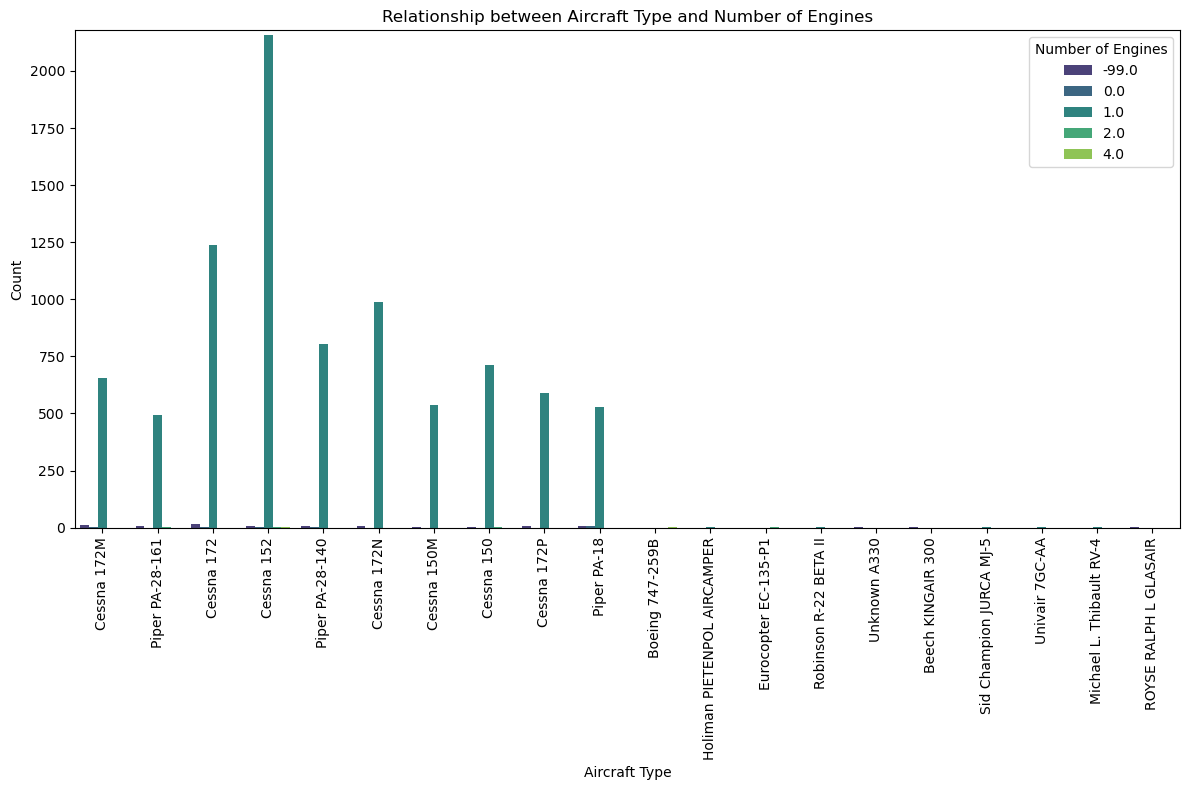

In [34]:
# Getting the top 10 and bottom 10 aircraft types based on occurrence counts
top_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().head(10).index.tolist()
bottom_10_aircraft_types = aviation_data_clean['Aircraft.Type'].value_counts().tail(10).index.tolist()

# Filtering the dataset to include only the top 10 and bottom 10 aircraft types
top_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(top_10_aircraft_types)]
bottom_10_data = aviation_data_clean[aviation_data_clean['Aircraft.Type'].isin(bottom_10_aircraft_types)]

# Concatenating the top 10 and bottom 10 data
combined_data = pd.concat([top_10_data, bottom_10_data])

# Plotting the relationship between aircraft type and number of engines
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_data, x='Aircraft.Type', hue='Number.of.Engines', palette='viridis')
plt.title('Relationship between Aircraft Type and Number of Engines')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Number of Engines')
plt.ylim(0, combined_data['Aircraft.Type'].value_counts().max() + 10)  # Ensuring the plot starts at 0
plt.tight_layout()
plt.show()

The output being displayed is consistent withb a couple of other visualizations that have been generated which gives insight that they are most likely low-risk airplanes found in the dataset.

## Conclusion

The lesser value count of an aircraft model appearing in the dataset could potentially indicate it is a low-risk aircraft, but this conclusion cannot be drawn definitively without further analysis. The value count alone is not sufficient to determine the risk level of an aircraft because of considerations like exposure to risk. Aircraft models that are less frequently used or have fewer flight hours will naturally have fewer accidents, simply because they are flown less often. This does not necessarily mean they are safer. 
Factors such as maintenance practices, pilot training, operational procedures, and regulatory compliance can significantly influence the safety of an aircraft model, independent of its frequency in the dataset.
The lack of a features like flight hours, number of accidents of an aircraft type per year, maintenance practices, manufacture date, pilot training and operational procedures contribute largely to an indefinite conclusion on the risk level of the airplane types given in the dataset.


## Recommendation

After a thorough analysis of the provided dataset, a consistent trend of low frequency in aircraft models across multiple features was identified. Based on these findings, the following list comprises aircraft types that can be considered low-risk and are recommended for the company's consideration:

### List of low risk Aircrafts

In [35]:
# Selecting the required columns from the bottom 10 DataFrame
recommended_planes_df = bottom_10_data[['Aircraft.Type', 'Number.of.Engines', 'Engine.Type', 'Amateur.Built']]

# Renaming the columns
recommended_planes_df.columns = ['Aircraft Type', 'No of Engines', 'Type of Engine', 'Amateur Built']

# Adding an index starting from 1
recommended_planes_df.index = range(1, len(recommended_planes_df) + 1)
recommended_planes_df

,Aircraft Type,No of Engines,Type of Engine,Amateur Built
1,Boeing 747-259B,4.0,Turbo Jet,No
2,Holiman PIETENPOL AIRCAMPER,1.0,Reciprocating,Yes
3,Eurocopter EC-135-P1,2.0,Turbo Shaft,No
4,Robinson R-22 BETA II,1.0,Reciprocating,No
5,Unknown A330,-99.0,Unknown,No
6,Beech KINGAIR 300,-99.0,Unknown,No
7,Sid Champion JURCA MJ-5,1.0,Reciprocating,Yes
8,Univair 7GC-AA,1.0,Reciprocating,No
9,Michael L. Thibault RV-4,1.0,Reciprocating,Yes
10,ROYSE RALPH L GLASAIR,-99.0,Unknown,No
